In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import matplotlib.pyplot as plt
from pathlib import Path

#The Cat Face Mapper!
Upload the photo of a cat, select the model for creating the predictions (ResNet18,ResNet34) and click *Get Face Points*.The output is an image with the facial features marked. The model predicts nine locations (facial features) in the image:
* Left Eye
* Right Eye
* Mouth
* Left Ear-1
* Left Ear-2
* Left Ear-3
* Right Ear-1
* Right Ear-2
* Right Ear-3

**Important Note:** Don't upload photos of your friends, people might not like being called a cat (catcalled). Let's just stick to images of cats. 


In [ ]:
def get_face_points(f):
  face_points=np.genfromtxt(img2face(f))[1:]
  return tensor(face_points)

In [ ]:
path = Path()

(#2) [Path('export.pkl'),Path('export2.pkl')]

In [ ]:
learn_inf=load_learner(path/'export.pkl',cpu=True)

In [ ]:
learn_inf2=load_learner(path/'export2.pkl',cpu=True)

In [ ]:
btn_upload=widgets.FileUpload() #upload button
btn_fpoints=widgets.Button(description='Get Face Points') #button to get the face points
lbl_orig = widgets.Label() #original image label 
out_pl=widgets.Output() #output original image
model_select=widgets.Dropdown(
    options=[('Resnet18',1),('Resnet34',2)],
    value=1,
    description="Select model:") #dropdown to select the model Resnet18 or Resnet34 

In [ ]:
def show_pred(img,coords):
  w,h=img.size
  for i,j in coords:
    plt.plot((i/500)*w,(j/500)*h,marker='x',color='red')
  plt.imshow(img)

In [ ]:
def on_click_fpoints(change):
  img=PILImage.create(btn_upload.data[-1])
  lbl_orig.value=f'Uploaded Image:'
  out_pl.clear_output()
  with out_pl:display(img.to_thumb(256,256))
  ind=model_select.index
  if ind==0:
    preds,_,_=learn_inf.predict(img)
    print('Model: Resnet18 , Output Image:')
  elif ind==1:
    preds,_,_=learn_inf2.predict(img)
    print('Model: Resnet34 , Output Image:')
  show_pred(img,preds)

btn_fpoints.on_click(on_click_fpoints) #what to do when button is clicked 

Model: Resnet34 , Output Image:


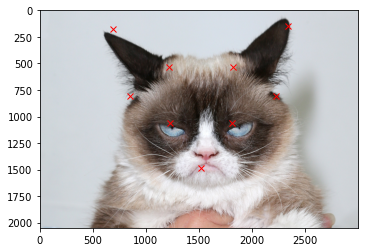

In [ ]:
VBox([widgets.Label('Select your cat!'), 
      btn_upload,
      model_select,
      btn_fpoints,
      lbl_orig,
      out_pl])